## Problem Statement

CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the **highest claim settlement ratio**. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


As it's a fast growing startup, the company would like to **optimize the cost of the insurance** by identifying the policyholders who are more likely to claim in the next 6 months. 

**Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months**. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.

**Predict whether the policyholder will file a claim in the next 6 months or not.**

policy_id:Unique identifier of the policyholder

policy_tenure:Time period of the policy

age_of_car:Normalized age of the car in years

age_of_policyholder:Normalized age of policyholder in years

area_cluster:Area cluster of the policyholder

population density:Population density of the city (Policyholder City)

make:Encoded Manufacturer/company of the car

segment:Segment of the car (A/ B1/ B2/ C1/ C2)

model:Encoded name of the car

fuel_type:Type of fuel used by the car

max_torque:Maximum Torque generated by the car (Nm@rpm)

max_power:Maximum Power generated by the car (bhp@rpm)

engine_type:Type of engine used in the car

airbags:Number of airbags installed in the car

is_esc:Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not.

is_adjustable_steering:Boolean flag indicating whether the steering wheel of the car is adjustable or not.

is_tpms:Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not.

is_parking_sensors:Boolean flag indicating whether parking sensors are present in the car or not.

is_parking_camera:Boolean flag indicating whether the parking camera is present in the car or not.

rear_brakes_type:Type of brakes used in the rear of the car

displacement:Engine displacement of the car (cc)

cylinder:Number of cylinders present in the engine of the car

transmission_type:Transmission type of the car

gear_box:Number of gears in the car

steering_type:Type of the power steering present in the car

turning_radius:The space a vehicle needs to make a certain turn (Meters)

length:Length of the car (Millimetre)

width:Width of the car (Millimetre)

height:Height of the car (Millimetre)

gross_weight:The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)

is_front_fog_lights:Boolean flag indicating whether front fog lights are available in the car or not.

is_rear_window_wiper:Boolean flag indicating whether the rear window wiper is available in the car or not.

is_rear_window_washer:Boolean flag indicating whether the rear window washer is available in the car or not.

is_rear_window_defogger:Boolean flag indicating whether rear window defogger is available in the car or not.

is_brake_assist:Boolean flag indicating whether the brake assistance feature is available in the car or not.

is_power_door_lock:Boolean flag indicating whether a power door lock is available in the car or not.

is_central_locking:Boolean flag indicating whether the central locking feature is available in the car or not.

is_power_steering:Boolean flag indicating whether power steering is available in the car or not.

is_driver_seat_height_adjustable:Boolean flag indicating whether the height of the driver seat is adjustable or not.

is_day_night_rear_view_mirror:Boolean flag indicating whether day & night rearview mirror is present in the car or not.

is_ecw:Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not.

is_speed_alert:Boolean flag indicating whether the speed alert system is available in the car or not.

ncap_rating:Safety rating given by NCAP (out of 5)

is_claim::Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [3]:
pd.set_option('display.max_columns',100)

In [4]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
#Lets Combine the train test data

combined=pd.concat([train,test],ignore_index=True)

In [6]:
#Lets check the dimensions of the Dataset

train.shape,test.shape,combined.shape

((58592, 44), (39063, 43), (97655, 44))

In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         97655 non-null  object 
 1   policy_tenure                     97655 non-null  float64
 2   age_of_car                        97655 non-null  float64
 3   age_of_policyholder               97655 non-null  float64
 4   area_cluster                      97655 non-null  object 
 5   population_density                97655 non-null  int64  
 6   make                              97655 non-null  int64  
 7   segment                           97655 non-null  object 
 8   model                             97655 non-null  object 
 9   fuel_type                         97655 non-null  object 
 10  max_torque                        97655 non-null  object 
 11  max_power                         97655 non-null  object 
 12  engi

In [8]:
num_cols=combined.select_dtypes(include=np.number).columns
cat_cols=combined.select_dtypes(include='object').columns

In [9]:
len(num_cols),len(cat_cols)

(16, 28)

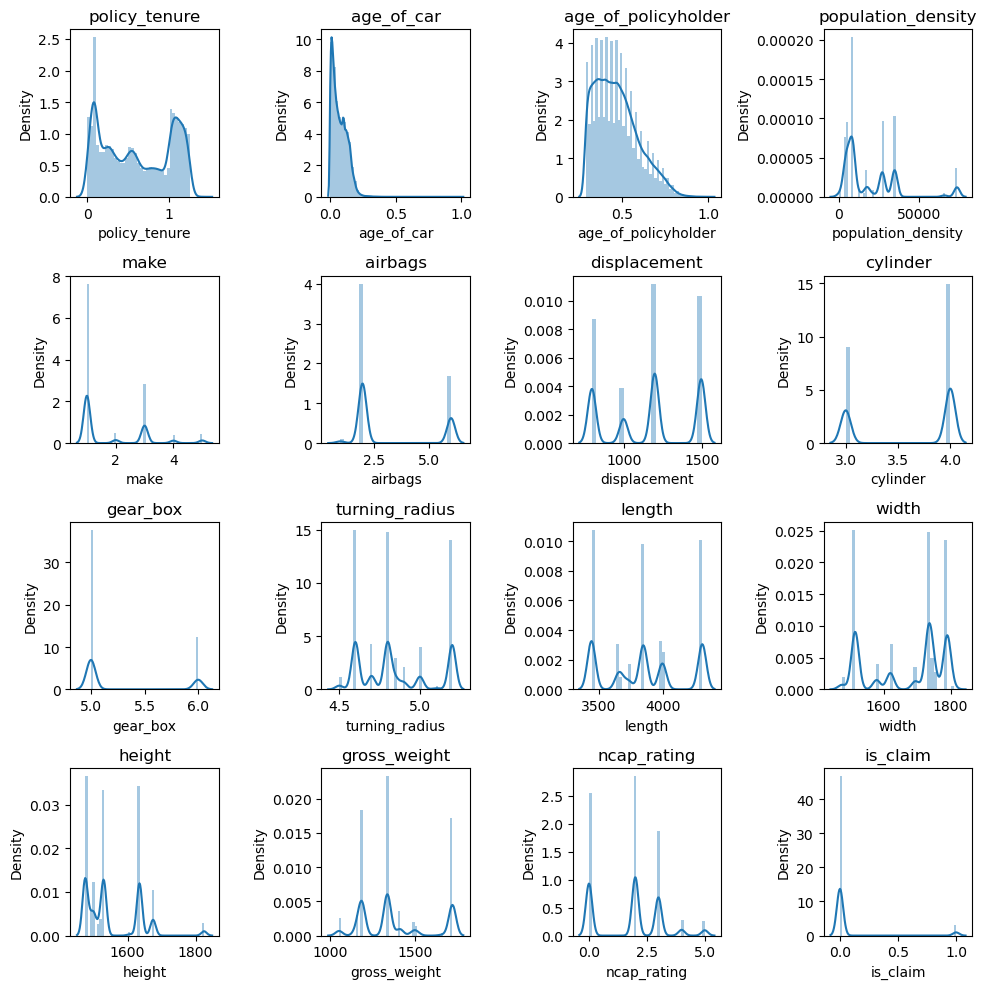

In [10]:
plt.figure(figsize=(10,10))

ncols=4
nrows=4
t=1

for i in num_cols:
    plt.subplot(nrows,ncols,t)
    sns.distplot(combined.loc[:,i])
    plt.title(i)
    t+=1
    
    
plt.tight_layout()
plt.show()

* Policy Tenure ranges from 0 to 1.2.
* Age_of_car is majorly right skewed, and maximum data ranges from 0 to 0.2
* Age_of_policyholder is right skewed

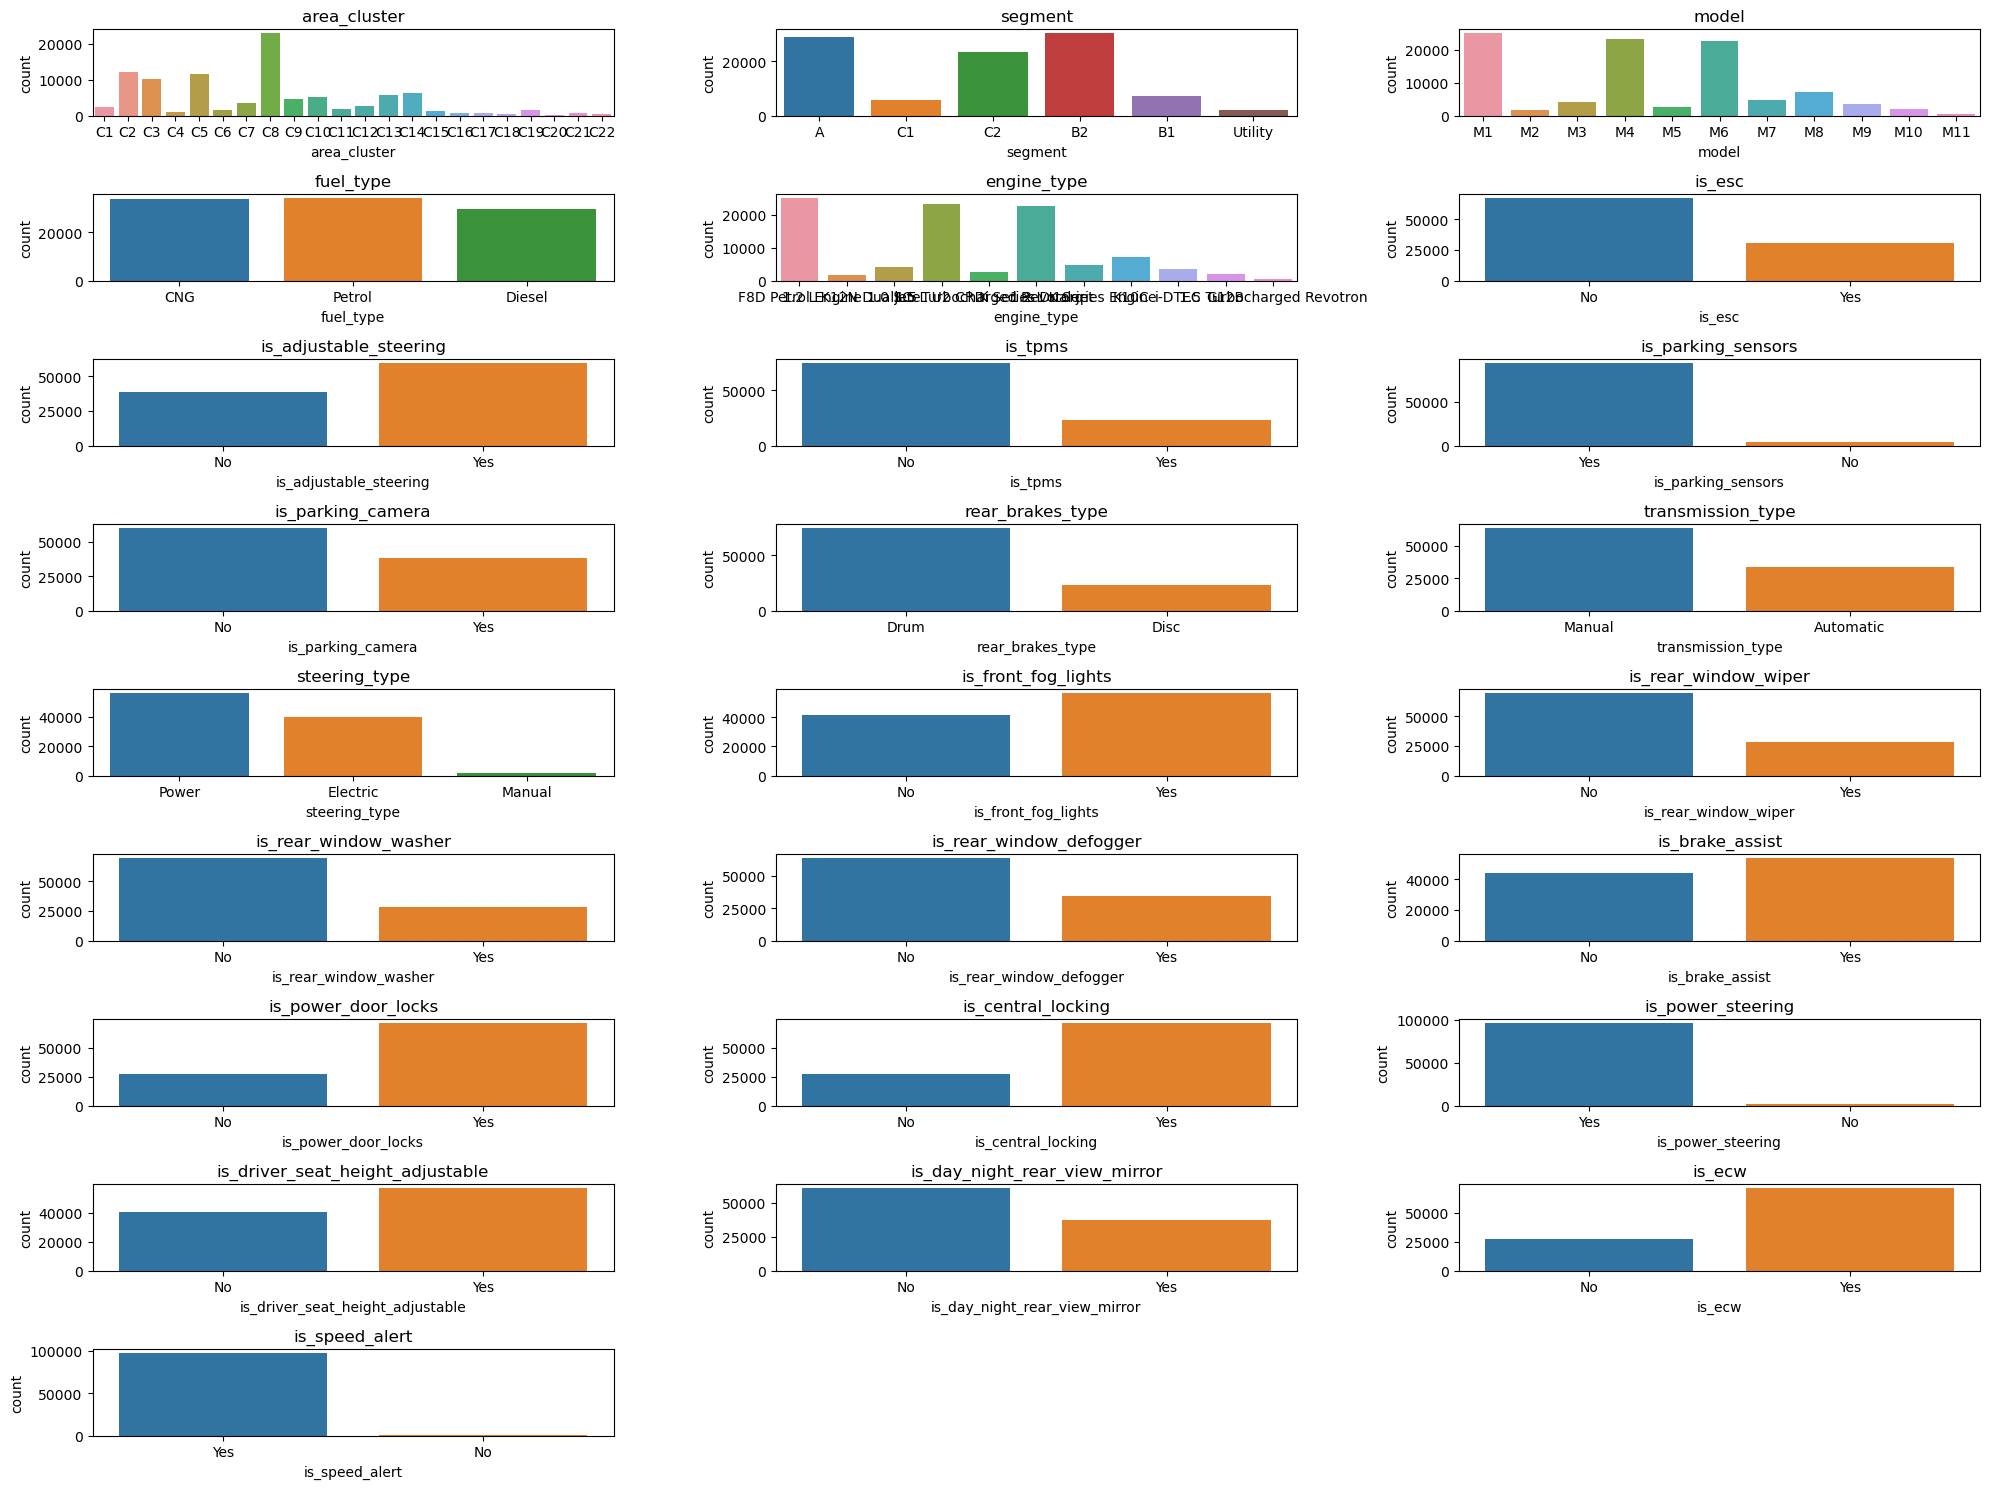

In [11]:
plt.figure(figsize=(20,15))

cat_vars=[ 'area_cluster', 'segment', 'model', 'fuel_type','engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

ncols=3
nrows=9
t=1

for i in cat_vars:
    plt.subplot(nrows,ncols,t)
    sns.countplot(combined.loc[:,i])
    plt.title(i)
    t+=1
    
plt.tight_layout()
plt.show()

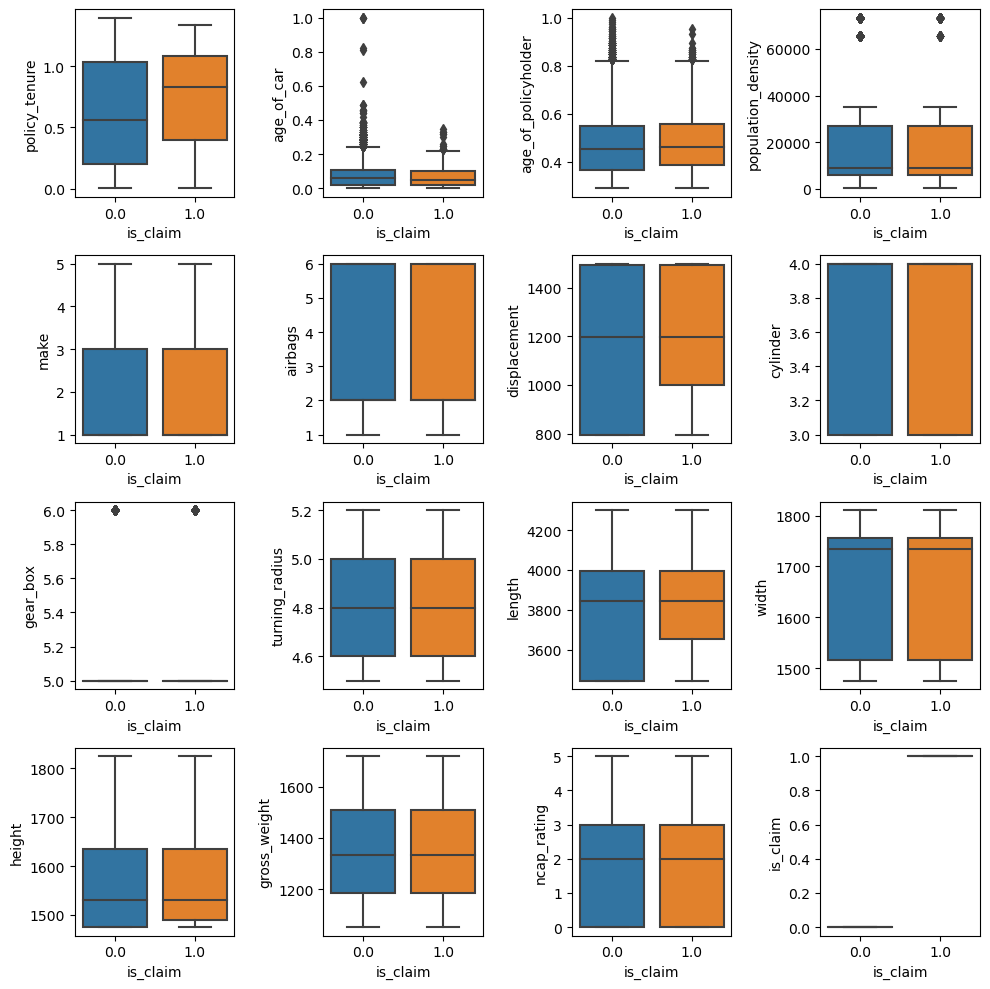

In [12]:
plt.figure(figsize=(10,10))

ncols=4
nrows=4
t=1

for i in num_cols:
    plt.subplot(nrows,ncols,t)
    sns.boxplot(combined.is_claim,combined.loc[:,i])
    t+=1
    
    
plt.tight_layout()
plt.show()

In [13]:
#Apply the statistical test

#Two sample Independent T Test
#Ho:: That the features have no impact on the Target or vice versa
#Ha:: That the features have an impact on Target or vice versa

imp_features=[]
import scipy.stats as stats

for i in num_cols:
    zero=combined.loc[combined.is_claim==0,i]
    one=combined.loc[combined.is_claim==1,i]
    teststats,pvalue=stats.ttest_ind(zero,one,alternative='two-sided')
    if pvalue<0.05:
        imp_features.append(i)
print(imp_features)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'cylinder', 'width', 'is_claim']


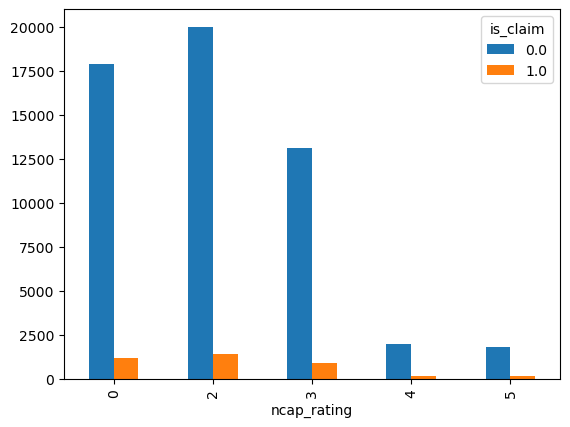

ncap rating pvalue 0.8325265632423358


In [14]:
#ncap_rating vs Target

pd.crosstab(combined.ncap_rating,combined.is_claim).plot(kind='bar')
plt.show()

#We can infer that the cars with lower ncap rating are more prone to the claims.

_,p1,_,_=stats.chi2_contingency(pd.crosstab(combined.ncap_rating,combined.is_claim))
print('ncap rating pvalue',p1)

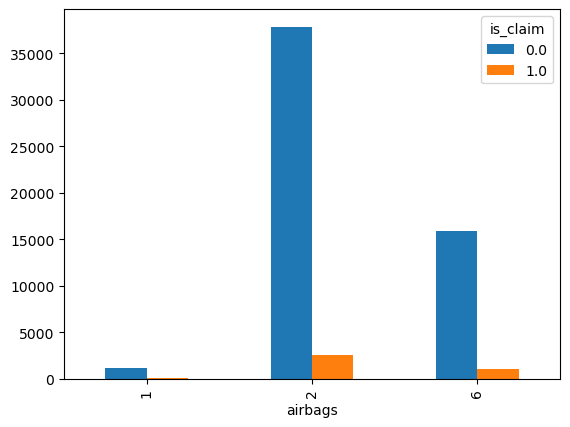

Airbags pvalue 0.733046343840305


In [15]:
#Airbag vs Target
pd.crosstab(combined.airbags,combined.is_claim).plot(kind='bar')
plt.show()

#We can infer that the cars with lower no. of airbags are more prone to the claims.

_,p2,_,_=stats.chi2_contingency(pd.crosstab(combined.airbags,combined.is_claim))
print('Airbags pvalue',p2)

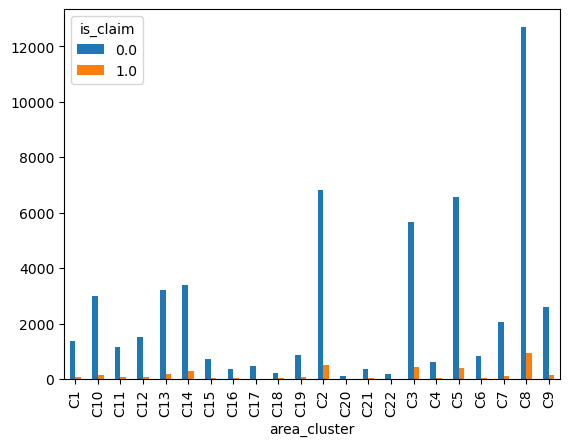

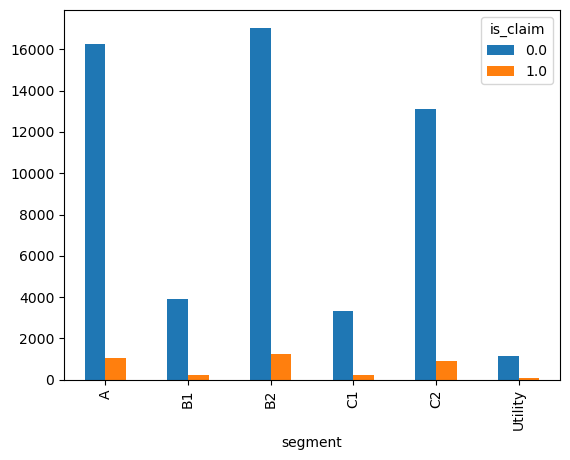

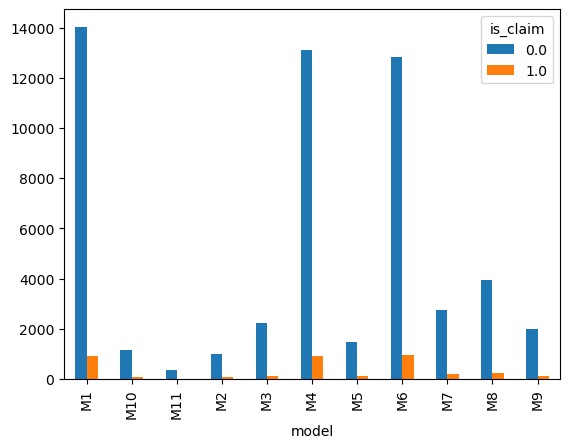

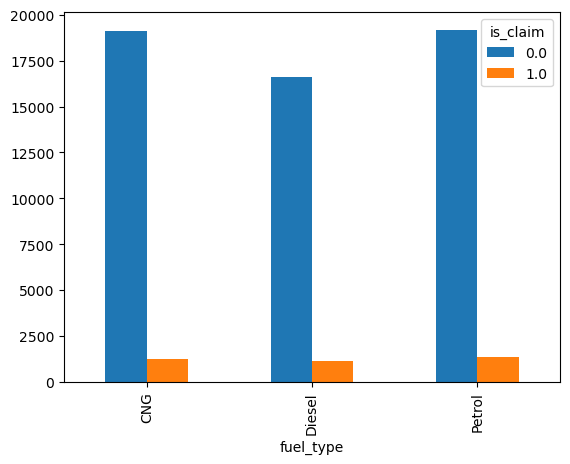

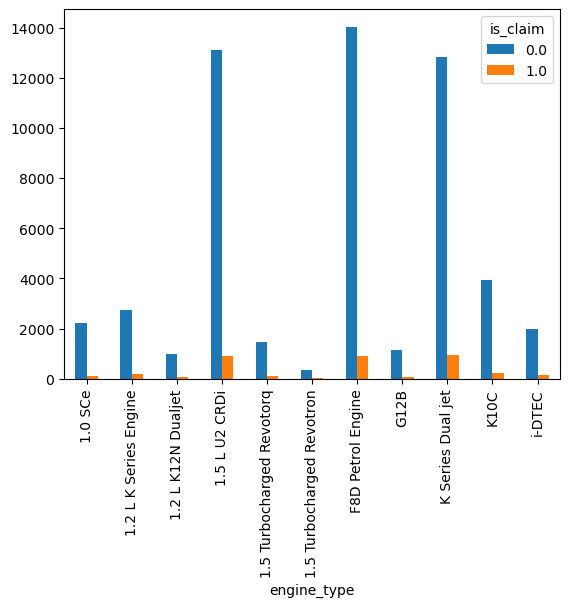

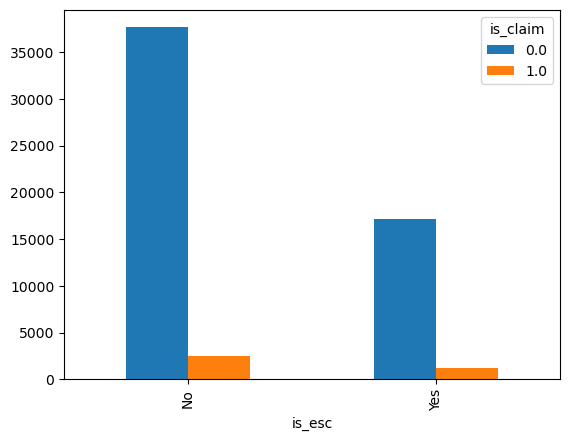

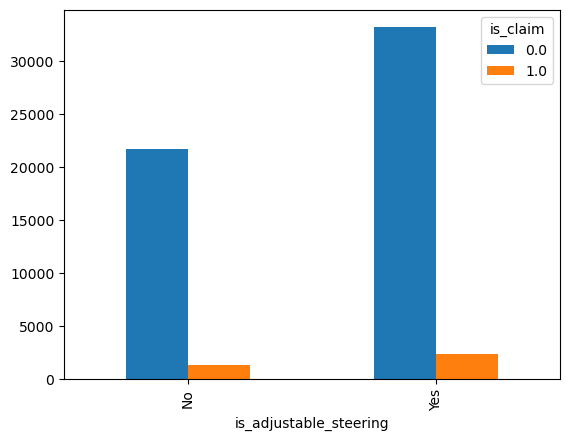

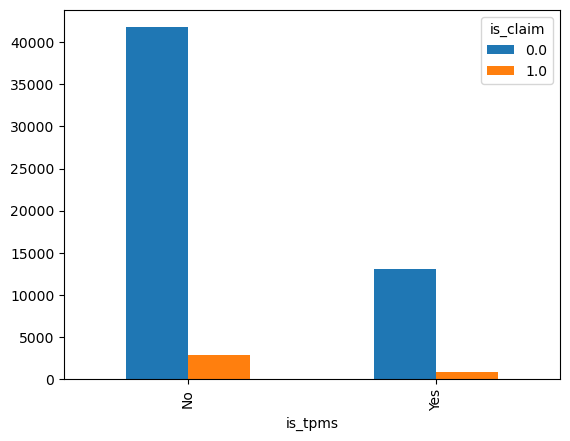

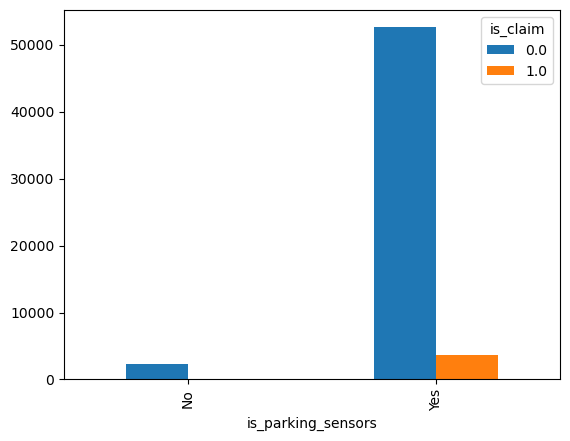

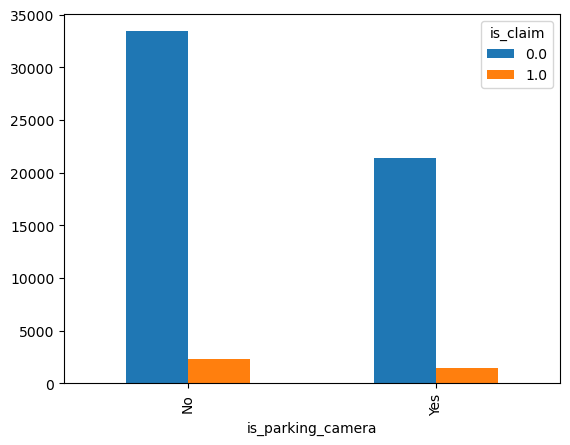

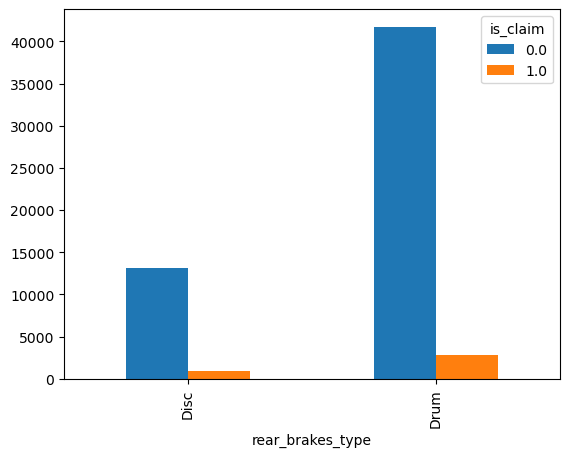

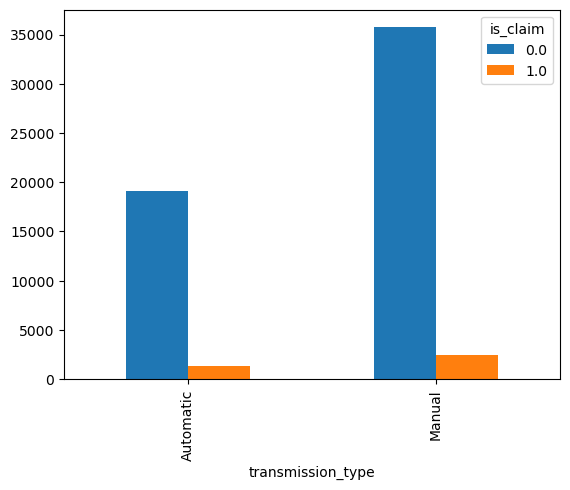

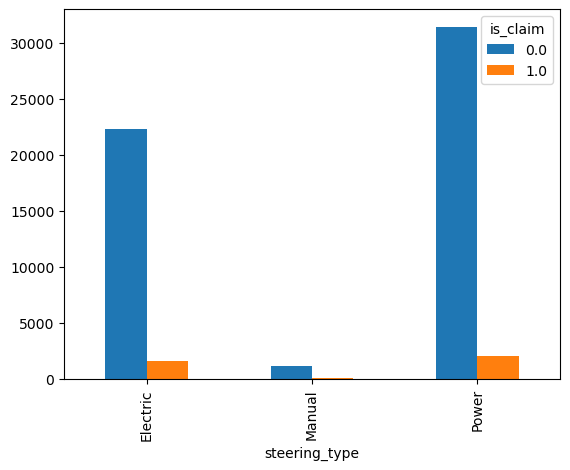

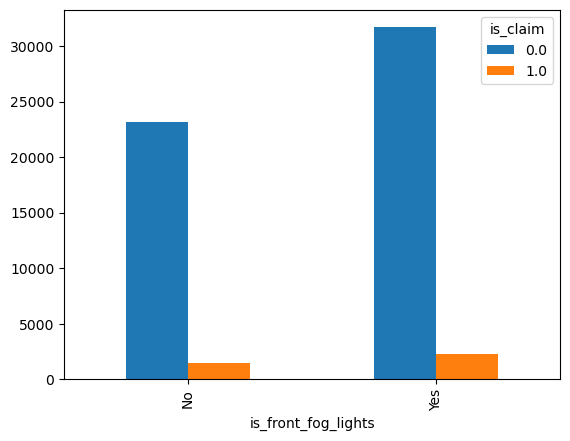

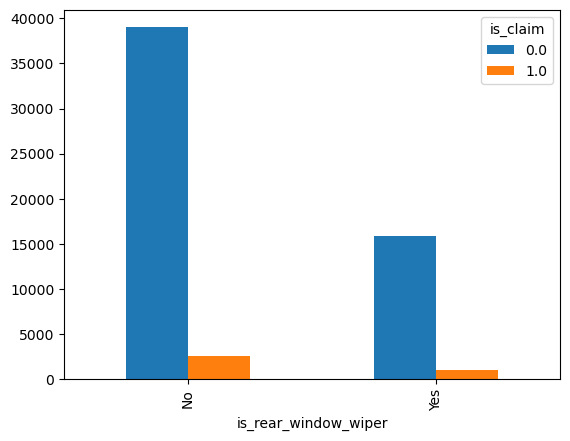

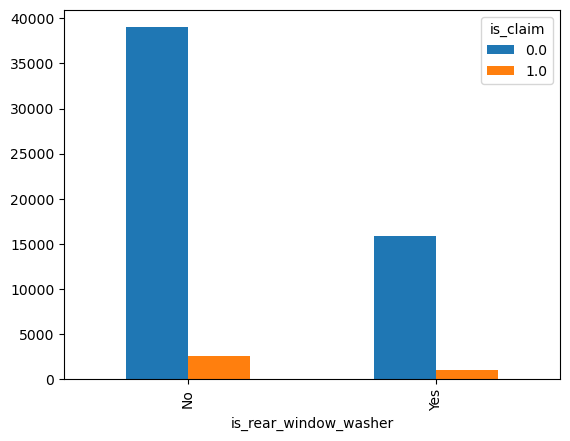

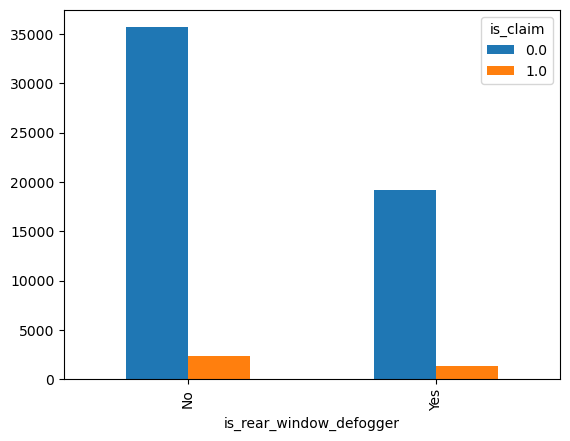

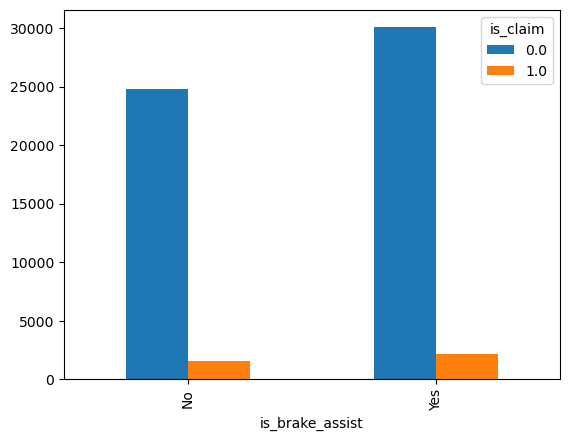

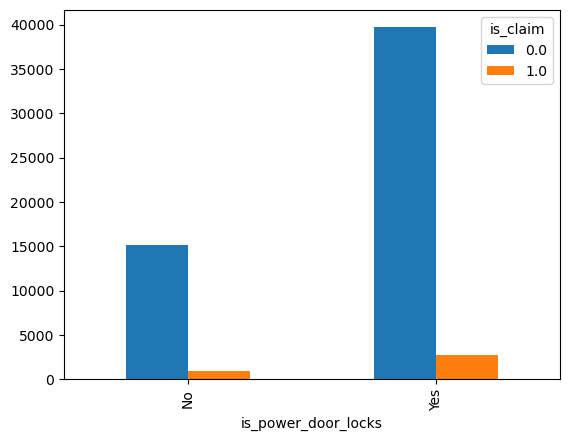

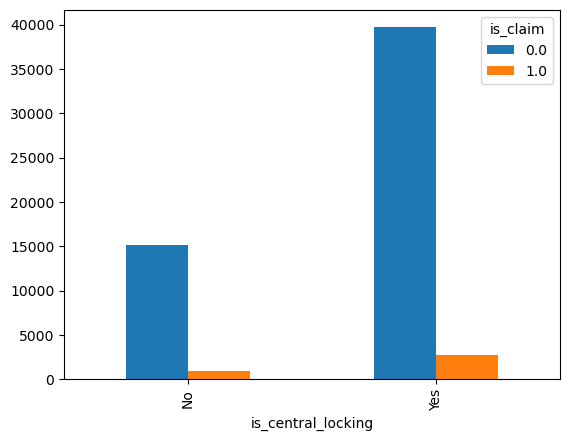

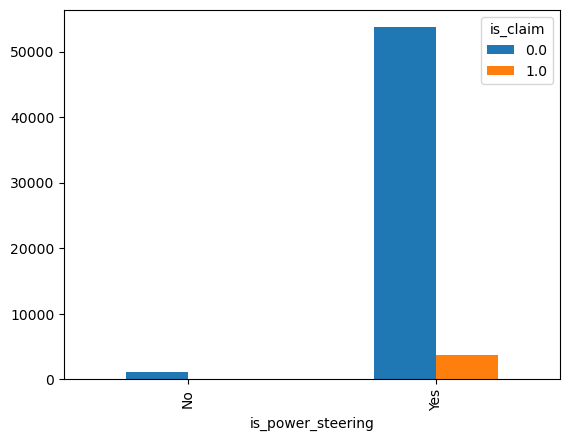

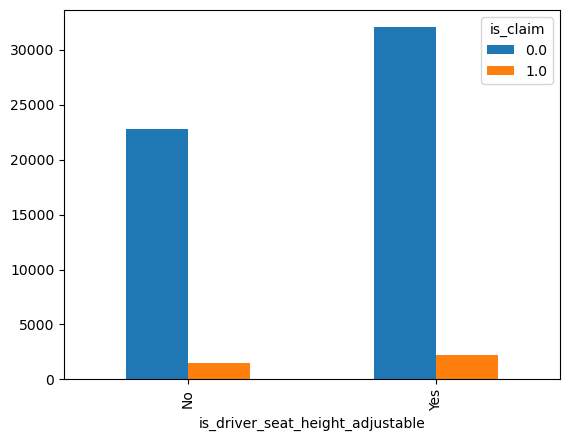

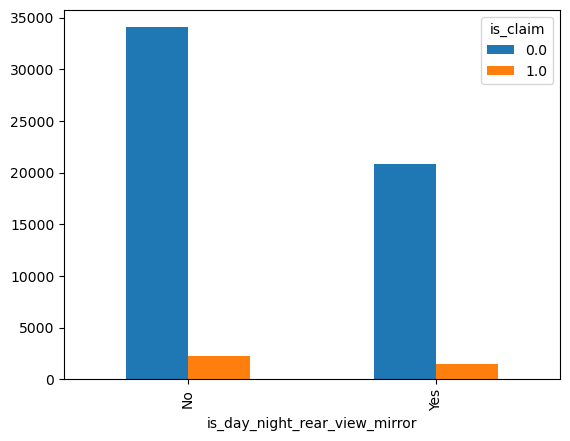

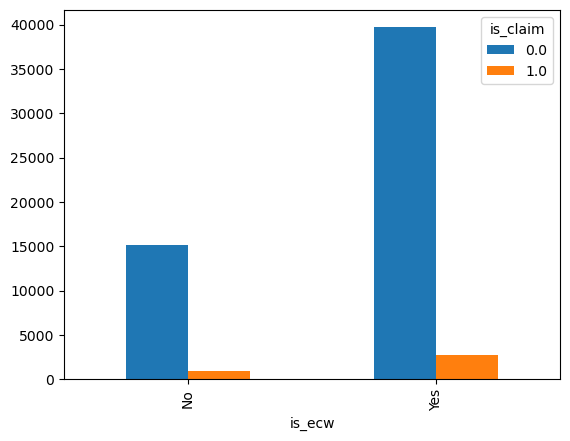

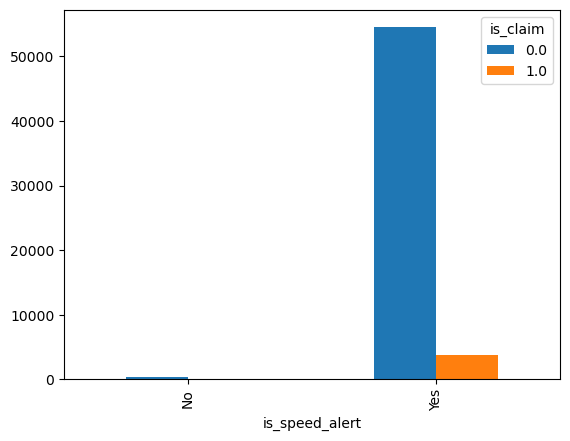

In [16]:
#cat vs Target

for i in cat_vars:
    pd.crosstab(combined.loc[:,i],combined.is_claim).plot(kind='bar')
    plt.show()

In [17]:
#cat vs Target

cat_features=[]

for i in cat_vars:
    tbl=pd.crosstab(combined.loc[:,i],combined.is_claim)
    teststats,pvalue,dof,exp_frq=stats.chi2_contingency(tbl)
    if pvalue<0.05:
        cat_features.append(i)

print(cat_features)

['area_cluster', 'segment', 'model', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable']


In [18]:
#Feature Engineering

combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


In [19]:
#Max_Torque

combined[['nm_torque','rpm_torque']]=combined.max_torque.str.split('@',expand=True)

In [20]:
#Max_Power

combined[['hp','rpm_power']]=combined.max_power.str.split('@',expand=True)

In [21]:
combined['hp']=combined.hp.apply(lambda x: float(x[:-3]))
combined['rpm_power']=combined.rpm_power.apply(lambda x: float(x[:-3]))
combined['nm_torque']=combined.nm_torque.apply(lambda x: float(x[:-2]))
combined['rpm_torque']=combined.rpm_torque.apply(lambda x: float(x[:-3]))

In [22]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0,113.0,4400.0,88.50,6000.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0,91.0,4250.0,67.06,5500.0


In [23]:
for i in cat_vars:
    if (i.startswith('is'))&(i!='is_claim'):
        mapp={'Yes':1,'No':0}
        combined[i]=combined[i].map(mapp)

In [24]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0


In [25]:
combined.isnull().sum()[combined.isnull().sum()!=0]

is_claim    39063
dtype: int64

In [26]:
combined.engine_type.value_counts()

F8D Petrol Engine            24988
1.5 L U2 CRDi                23383
K Series Dual jet            22827
K10C                          7067
1.2 L K Series Engine         4886
1.0 SCe                       4023
i-DTEC                        3508
1.5 Turbocharged Revotorq     2650
G12B                          1934
1.2 L K12N Dualjet            1790
1.5 Turbocharged Revotron      599
Name: engine_type, dtype: int64

In [27]:
#per unit torque
combined['per_unit_torque']=combined.rpm_torque/combined.nm_torque
combined['per_unit_power']=combined.rpm_power/combined.hp

In [28]:
combined.loc[:,['age_of_car','age_of_policyholder']].corr()

,age_of_car,age_of_policyholder
age_of_car,1.000000,-0.034864
age_of_policyholder,-0.034864,1.000000


In [29]:
combined['age_prop']=combined.age_of_car/combined.age_of_policyholder

In [30]:
#count of policy id using area cluster
combined['magic1']=combined.groupby('area_cluster')['policy_id'].transform('nunique')

In [31]:
zero=combined.loc[combined.is_claim==0,'magic1']
one=combined.loc[combined.is_claim==1,'magic1']

stats.ttest_ind(zero,one)

Ttest_indResult(statistic=-4.251501393229285, pvalue=2.1267052931968336e-05)

In [32]:
# count of policy in Magic1/pop density

combined['magic2']=combined.magic1/combined.population_density

In [33]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246


In [34]:
#combine['magic4']=combined.groupby('policy_id')['policy_tenure'].transform('min')
#combine['magic4']=combined.groupby('policy_id')['policy_tenure'].transform('max')
#combine['magic4']=combined.groupby('policy_id')['policy_tenure'].transform('mean')
#combined['magic4']=combined.groupby('area_cluster')['policy_tenure'].transform('median')

In [35]:
#Finding the summary statistics of Policy Tenure using area cluster.

combined['magic3']=combined.groupby('area_cluster')['policy_tenure'].transform('min')
combined['magic4']=combined.groupby('area_cluster')['policy_tenure'].transform('max')
combined['magic5']=combined.groupby('area_cluster')['policy_tenure'].transform('mean')
combined['magic6']=combined.groupby('area_cluster')['policy_tenure'].transform('median')

In [36]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343


In [37]:
list_feats=['magic3','magic4','magic5','magic6']
for i in list_feats:
    zero=combined.loc[combined.is_claim==0,i]
    one=combined.loc[combined.is_claim==1,i]
    teststats,pvalue=stats.ttest_ind(zero,one)
    print('pvalue',i,pvalue)

pvalue magic3 0.01517380140799255
pvalue magic4 0.1896759377985605
pvalue magic5 2.5550496912611606e-07
pvalue magic6 2.4634736641066477e-07


In [38]:
#area, segment, model, fuel_type, engine, rear_brakes, transmission, steering

In [39]:
pd.crosstab(combined.is_claim, combined.engine_type)

engine_type,1.0 SCe,1.2 L K Series Engine,1.2 L K12N Dualjet,1.5 L U2 CRDi,1.5 Turbocharged Revotorq,1.5 Turbocharged Revotron,F8D Petrol Engine,G12B,K Series Dual jet,K10C,i-DTEC
is_claim,,,,,,,,,,,
0.0,2245,2739,1000,13117,1482,348,14030,1136,12837,3929,1981
1.0,128,201,80,901,116,15,918,73,939,244,133


<AxesSubplot:xlabel='transmission_type'>

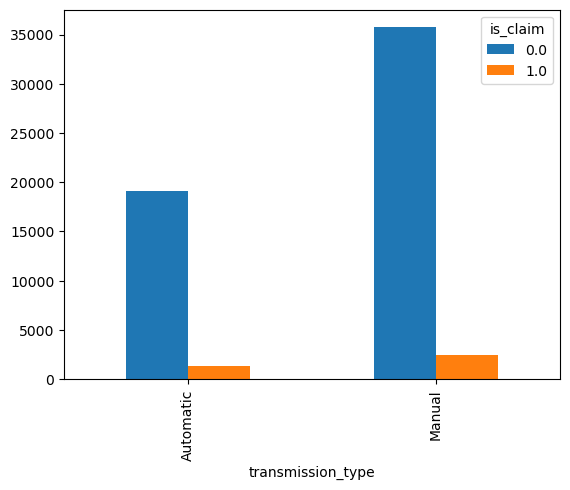

In [40]:
pd.crosstab(combined.transmission_type,combined.is_claim).plot(kind='bar')

In [41]:
#give 1 where frequency of claim is higher.
combined['transmission_type']=combined.transmission_type.map({'Manual':1,'Automatic':0})

<AxesSubplot:xlabel='rear_brakes_type'>

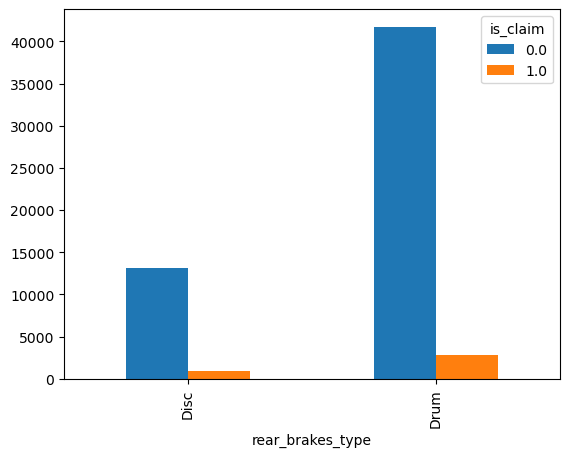

In [42]:
pd.crosstab(combined.rear_brakes_type,combined.is_claim).plot(kind='bar')

In [43]:
combined['rear_brakes_type']=np.where(combined.rear_brakes_type=='Drum',1,0)

In [44]:
#Target encoding in steering type,
#coz frequency encoding is introducing high bias
combined.steering_type.value_counts(normalize=True)

Power       0.573826
Electric    0.406369
Manual      0.019804
Name: steering_type, dtype: float64

In [47]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.052000,10172,2.495584,0.002753,1.262558,0.493563,0.436682
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,1,1197,4,0,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.254222,1112,0.051429,0.002773,1.247390,0.509921,0.457736
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,1,999,3,0,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.173333,11683,0.336318,0.002768,1.396641,0.520588,0.487713


In [48]:
combined.drop(columns=['policy_id','max_torque','max_power','magic4'],inplace=True)

In [49]:
#Split the Data in Train and Test
newtrain=combined.loc[0:train.shape[0]-1, ]
newtest=combined.loc[train.shape[0]:, ]

In [50]:
train.shape,newtrain.shape,test.shape,newtest.shape

((58592, 44), (58592, 53), (39063, 43), (39063, 53))

In [51]:
#Drop the target variable from train and test
X=newtrain.drop('is_claim',axis=1)
newtest=newtest.drop('is_claim',axis=1)
y=newtrain.is_claim

In [45]:
#!pip install category_encoders

In [46]:
#Target encoding for all categorical columns where categories are more than 2.

t_cols=['area_cluster','steering_type','engine_type','model','fuel_type','segment']

import category_encoders as ce

tgt=ce.TargetEncoder(cols=t_cols)

In [53]:
newx=tgt.fit_transform(X,y)
test_encoded=tgt.transform(newtest)

In [54]:
newx.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic5,magic6
0,0.515874,0.05,0.644231,0.051771,4990,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,0.471300,0.396802
1,0.672619,0.02,0.375000,0.070825,27003,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,0.609815,0.572343
2,0.841110,0.02,0.384615,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.052000,10172,2.495584,0.002753,0.493563,0.436682
3,0.900277,0.11,0.432692,0.076692,21622,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,1,1197,4,0,5,0.066873,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.254222,1112,0.051429,0.002773,0.509921,0.457736
4,0.596403,0.11,0.634615,0.057745,34738,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,1,999,3,0,5,0.066873,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.173333,11683,0.336318,0.002768,0.520588,0.487713


In [56]:
#create unit weight
newx['per_unit_vol'] = newx.gross_weight/(newx.length*newx.width*newx.height)
test_encoded['per_unit_vol'] = test_encoded.gross_weight/(test_encoded.length*test_encoded.width*test_encoded.height)

In [57]:
#Scaling the DataSet
scale=['policy_tenure','population_density','displacement','length',
       'width','height','gross_weight','nm_torque','rpm_torque','hp','rpm_power',
      'per_unit_power','magic1','magic3','magic5','magic6']

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

for i in scale:
    newx.loc[:,i]=sc.fit_transform(pd.DataFrame(newx.loc[:,i]))
    test_encoded.loc[:,i]=sc.transform(pd.DataFrame(test_encoded.loc[:,i]))

# Building Machine Learning Models
**RandomForestModel**

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')

pred=rf.fit(newx,y).predict(test_encoded)

In [60]:
submission['is_claim']=pred

In [61]:
submission.to_csv('rf_basemodel.csv',index=False)    #f1_Score==0.0371

In [62]:
#Apply SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [63]:
#Resample the Data using SMOTE
smotex,smotey=smote.fit_resample(newx,y)

In [65]:
rf=RandomForestClassifier(criterion='entropy')

pred_smote=rf.fit(smotex,smotey).predict(test_encoded)

In [66]:
submission['is_claim']=pred_smote
submission.to_csv('smote_rf_model.csv',index=False)

In [67]:
#!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 5.0 MB/s eta 0:00:00


In [68]:
#!pip install catboost

     ---------------------------------------- 74.0/74.0 MB 4.6 MB/s eta 0:00:00


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [79]:
#Define the base models

def base_models():
    models=dict()
    models['lg']=LogisticRegression()
    models['rf']=RandomForestClassifier(criterion='entropy')
    models['ada']=AdaBoostClassifier()
    models['gbm']=GradientBoostingClassifier()
    models['xgb']=XGBClassifier()
    models['lgbm']=LGBMClassifier()
    #models['catboost']=CatBoostClassifier()
    models['naivebayes']=GaussianNB()
    return models

In [80]:
#Evaluation Function.....
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score,StratifiedKFold

def eval_score(model):
    cv1=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score=cross_val_score(model,smotex,smotey,
                         scoring='f1',cv=cv1,
                         error_score='raise', n_jobs=-1)
    return score

In [88]:
#Build the models....
models=base_models()


result, names =list(), list()
for name, model in models.items():
    finalscore=eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'%(name,np.mean(result),np.std(result)))

lg 0.586 (0.004)
rf 0.747 (0.161)
ada 0.738 (0.132)
gbm 0.776 (0.132)
xgb 0.813 (0.139)
lgbm 0.836 (0.137)


CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/libs/train_lib/dir_helper.cpp:20: Can't create train working dir: catboost_info

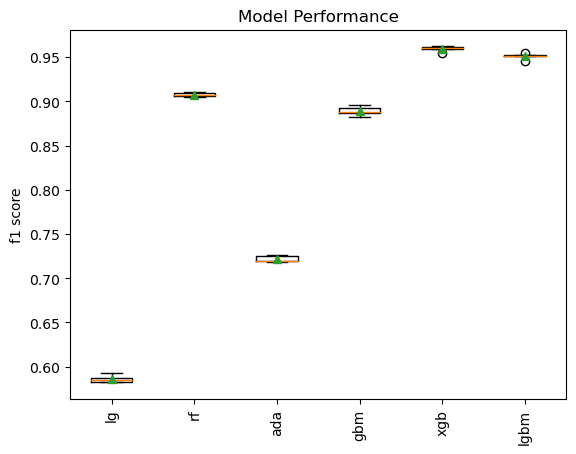

In [89]:
plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel('f1 score')
plt.title('Model Performance')
plt.show()

In [91]:
# Final models - xgb, lgbm, and catboost
estimators=[('xgb',XGBClassifier()),('lgbm',LGBMClassifier())]

cv1=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

from sklearn.ensemble import StackingClassifier
stack=StackingClassifier(estimators=estimators,final_estimator=CatBoostClassifier(),
                        cv=cv1)

In [92]:
pred_stack=stack.fit(smotex,smotey).predict(test_encoded)

Learning rate set to 0.076574
0:	learn: 0.5215621	total: 278ms	remaining: 4m 37s
1:	learn: 0.4035987	total: 344ms	remaining: 2m 51s
2:	learn: 0.3514941	total: 392ms	remaining: 2m 10s
3:	learn: 0.2923718	total: 444ms	remaining: 1m 50s
4:	learn: 0.2531140	total: 505ms	remaining: 1m 40s
5:	learn: 0.2244469	total: 577ms	remaining: 1m 35s
6:	learn: 0.2035172	total: 635ms	remaining: 1m 30s
7:	learn: 0.1894910	total: 689ms	remaining: 1m 25s
8:	learn: 0.1783539	total: 769ms	remaining: 1m 24s
9:	learn: 0.1693205	total: 821ms	remaining: 1m 21s
10:	learn: 0.1626514	total: 874ms	remaining: 1m 18s
11:	learn: 0.1565124	total: 921ms	remaining: 1m 15s
12:	learn: 0.1517526	total: 972ms	remaining: 1m 13s
13:	learn: 0.1479432	total: 1.05s	remaining: 1m 13s
14:	learn: 0.1446415	total: 1.1s	remaining: 1m 12s
15:	learn: 0.1417339	total: 1.15s	remaining: 1m 10s
16:	learn: 0.1398417	total: 1.19s	remaining: 1m 9s
17:	learn: 0.1379799	total: 1.24s	remaining: 1m 7s
18:	learn: 0.1365799	total: 1.32s	remaining: 1m

161:	learn: 0.1268465	total: 13.1s	remaining: 1m 7s
162:	learn: 0.1268325	total: 13.2s	remaining: 1m 7s
163:	learn: 0.1268173	total: 13.2s	remaining: 1m 7s
164:	learn: 0.1268106	total: 13.3s	remaining: 1m 7s
165:	learn: 0.1268024	total: 13.3s	remaining: 1m 6s
166:	learn: 0.1267903	total: 13.4s	remaining: 1m 6s
167:	learn: 0.1267832	total: 13.5s	remaining: 1m 6s
168:	learn: 0.1267753	total: 13.6s	remaining: 1m 6s
169:	learn: 0.1267649	total: 13.7s	remaining: 1m 6s
170:	learn: 0.1267504	total: 13.7s	remaining: 1m 6s
171:	learn: 0.1267391	total: 13.7s	remaining: 1m 6s
172:	learn: 0.1267301	total: 13.8s	remaining: 1m 5s
173:	learn: 0.1267159	total: 13.8s	remaining: 1m 5s
174:	learn: 0.1267035	total: 13.9s	remaining: 1m 5s
175:	learn: 0.1266976	total: 13.9s	remaining: 1m 5s
176:	learn: 0.1266976	total: 13.9s	remaining: 1m 4s
177:	learn: 0.1266875	total: 14s	remaining: 1m 4s
178:	learn: 0.1266773	total: 14s	remaining: 1m 4s
179:	learn: 0.1266700	total: 14.1s	remaining: 1m 4s
180:	learn: 0.12

320:	learn: 0.1253255	total: 20.2s	remaining: 42.7s
321:	learn: 0.1253150	total: 20.2s	remaining: 42.6s
322:	learn: 0.1253064	total: 20.3s	remaining: 42.5s
323:	learn: 0.1252957	total: 20.3s	remaining: 42.4s
324:	learn: 0.1252897	total: 20.3s	remaining: 42.2s
325:	learn: 0.1252839	total: 20.4s	remaining: 42.1s
326:	learn: 0.1252808	total: 20.4s	remaining: 42.1s
327:	learn: 0.1252742	total: 20.5s	remaining: 42s
328:	learn: 0.1252661	total: 20.5s	remaining: 41.8s
329:	learn: 0.1252594	total: 20.6s	remaining: 41.7s
330:	learn: 0.1252538	total: 20.6s	remaining: 41.6s
331:	learn: 0.1252505	total: 20.7s	remaining: 41.6s
332:	learn: 0.1252406	total: 20.7s	remaining: 41.5s
333:	learn: 0.1252316	total: 20.7s	remaining: 41.3s
334:	learn: 0.1252217	total: 20.8s	remaining: 41.2s
335:	learn: 0.1252128	total: 20.8s	remaining: 41.1s
336:	learn: 0.1252068	total: 20.9s	remaining: 41.1s
337:	learn: 0.1251958	total: 20.9s	remaining: 41s
338:	learn: 0.1251740	total: 21s	remaining: 40.9s
339:	learn: 0.1251

483:	learn: 0.1240100	total: 27.3s	remaining: 29.1s
484:	learn: 0.1239988	total: 27.3s	remaining: 29s
485:	learn: 0.1239904	total: 27.4s	remaining: 29s
486:	learn: 0.1239806	total: 27.4s	remaining: 28.9s
487:	learn: 0.1239775	total: 27.5s	remaining: 28.8s
488:	learn: 0.1239737	total: 27.5s	remaining: 28.7s
489:	learn: 0.1239662	total: 27.6s	remaining: 28.7s
490:	learn: 0.1239599	total: 27.6s	remaining: 28.6s
491:	learn: 0.1239508	total: 27.6s	remaining: 28.5s
492:	learn: 0.1239433	total: 27.7s	remaining: 28.5s
493:	learn: 0.1239398	total: 27.7s	remaining: 28.4s
494:	learn: 0.1239309	total: 27.8s	remaining: 28.3s
495:	learn: 0.1239279	total: 27.8s	remaining: 28.3s
496:	learn: 0.1239233	total: 27.9s	remaining: 28.2s
497:	learn: 0.1239187	total: 27.9s	remaining: 28.1s
498:	learn: 0.1239142	total: 27.9s	remaining: 28s
499:	learn: 0.1239033	total: 28s	remaining: 28s
500:	learn: 0.1238882	total: 28s	remaining: 27.9s
501:	learn: 0.1238786	total: 28.1s	remaining: 27.9s
502:	learn: 0.1238723	to

646:	learn: 0.1228592	total: 35.4s	remaining: 19.3s
647:	learn: 0.1228503	total: 35.5s	remaining: 19.3s
648:	learn: 0.1228460	total: 35.5s	remaining: 19.2s
649:	learn: 0.1228398	total: 35.6s	remaining: 19.2s
650:	learn: 0.1228323	total: 35.6s	remaining: 19.1s
651:	learn: 0.1228191	total: 35.7s	remaining: 19s
652:	learn: 0.1228165	total: 35.7s	remaining: 19s
653:	learn: 0.1228126	total: 35.8s	remaining: 18.9s
654:	learn: 0.1228023	total: 35.8s	remaining: 18.9s
655:	learn: 0.1228003	total: 35.8s	remaining: 18.8s
656:	learn: 0.1227961	total: 35.9s	remaining: 18.7s
657:	learn: 0.1227896	total: 35.9s	remaining: 18.7s
658:	learn: 0.1227757	total: 36s	remaining: 18.6s
659:	learn: 0.1227713	total: 36s	remaining: 18.6s
660:	learn: 0.1227683	total: 36.1s	remaining: 18.5s
661:	learn: 0.1227613	total: 36.1s	remaining: 18.4s
662:	learn: 0.1227612	total: 36.1s	remaining: 18.4s
663:	learn: 0.1227520	total: 36.2s	remaining: 18.3s
664:	learn: 0.1227520	total: 36.2s	remaining: 18.2s
665:	learn: 0.122749

805:	learn: 0.1219292	total: 45.4s	remaining: 10.9s
806:	learn: 0.1219192	total: 45.4s	remaining: 10.9s
807:	learn: 0.1219134	total: 45.5s	remaining: 10.8s
808:	learn: 0.1219073	total: 45.5s	remaining: 10.7s
809:	learn: 0.1219025	total: 45.5s	remaining: 10.7s
810:	learn: 0.1218989	total: 45.6s	remaining: 10.6s
811:	learn: 0.1218903	total: 45.7s	remaining: 10.6s
812:	learn: 0.1218838	total: 45.8s	remaining: 10.5s
813:	learn: 0.1218737	total: 45.9s	remaining: 10.5s
814:	learn: 0.1218684	total: 46s	remaining: 10.4s
815:	learn: 0.1218641	total: 46.1s	remaining: 10.4s
816:	learn: 0.1218572	total: 46.1s	remaining: 10.3s
817:	learn: 0.1218486	total: 46.2s	remaining: 10.3s
818:	learn: 0.1218426	total: 46.2s	remaining: 10.2s
819:	learn: 0.1218306	total: 46.3s	remaining: 10.2s
820:	learn: 0.1218278	total: 46.4s	remaining: 10.1s
821:	learn: 0.1218208	total: 46.5s	remaining: 10.1s
822:	learn: 0.1218193	total: 46.5s	remaining: 10s
823:	learn: 0.1218175	total: 46.6s	remaining: 9.95s
824:	learn: 0.12

966:	learn: 0.1210029	total: 57.1s	remaining: 1.95s
967:	learn: 0.1209969	total: 57.2s	remaining: 1.89s
968:	learn: 0.1209880	total: 57.2s	remaining: 1.83s
969:	learn: 0.1209860	total: 57.2s	remaining: 1.77s
970:	learn: 0.1209774	total: 57.3s	remaining: 1.71s
971:	learn: 0.1209730	total: 57.3s	remaining: 1.65s
972:	learn: 0.1209693	total: 57.4s	remaining: 1.59s
973:	learn: 0.1209652	total: 57.4s	remaining: 1.53s
974:	learn: 0.1209585	total: 57.5s	remaining: 1.47s
975:	learn: 0.1209519	total: 57.6s	remaining: 1.42s
976:	learn: 0.1209507	total: 57.8s	remaining: 1.36s
977:	learn: 0.1209475	total: 58s	remaining: 1.3s
978:	learn: 0.1209426	total: 58.2s	remaining: 1.25s
979:	learn: 0.1209402	total: 58.4s	remaining: 1.19s
980:	learn: 0.1209336	total: 58.5s	remaining: 1.13s
981:	learn: 0.1209284	total: 58.6s	remaining: 1.07s
982:	learn: 0.1209222	total: 58.7s	remaining: 1.01s
983:	learn: 0.1209182	total: 58.8s	remaining: 956ms
984:	learn: 0.1209169	total: 58.9s	remaining: 897ms
985:	learn: 0.1

In [93]:
submission['is_claim']=pred_stack
submission.to_csv('stack_model.csv',index=False)   #f1 score:: 0.022

In [94]:
#Direct CatBoost Model

cboost=CatBoostClassifier(scale_pos_weight=10)
pred_catboost=cboost.fit(smotex,smotey).predict(test_encoded)

submission['is_claim']=pred_catboost
submission.to_csv('catboostmodel.csv',index=False)

Learning rate set to 0.076574
0:	learn: 0.6241142	total: 341ms	remaining: 5m 41s
1:	learn: 0.5663820	total: 739ms	remaining: 6m 8s
2:	learn: 0.5198423	total: 869ms	remaining: 4m 48s
3:	learn: 0.4818932	total: 1.05s	remaining: 4m 20s
4:	learn: 0.4509731	total: 1.18s	remaining: 3m 55s
5:	learn: 0.4235499	total: 1.34s	remaining: 3m 42s
6:	learn: 0.4027296	total: 1.48s	remaining: 3m 29s
7:	learn: 0.3839113	total: 1.61s	remaining: 3m 20s
8:	learn: 0.3681815	total: 1.73s	remaining: 3m 10s
9:	learn: 0.3565573	total: 1.87s	remaining: 3m 5s
10:	learn: 0.3466873	total: 2s	remaining: 2m 59s
11:	learn: 0.3388583	total: 2.19s	remaining: 3m
12:	learn: 0.3305327	total: 2.33s	remaining: 2m 57s
13:	learn: 0.3230321	total: 2.47s	remaining: 2m 53s
14:	learn: 0.3169227	total: 2.59s	remaining: 2m 50s
15:	learn: 0.3122296	total: 2.74s	remaining: 2m 48s
16:	learn: 0.3070272	total: 2.85s	remaining: 2m 44s
17:	learn: 0.3030730	total: 3.04s	remaining: 2m 45s
18:	learn: 0.3003857	total: 3.23s	remaining: 2m 46s
1

160:	learn: 0.1762549	total: 22s	remaining: 1m 54s
161:	learn: 0.1757848	total: 22.1s	remaining: 1m 54s
162:	learn: 0.1752402	total: 22.1s	remaining: 1m 53s
163:	learn: 0.1750745	total: 22.2s	remaining: 1m 53s
164:	learn: 0.1749369	total: 22.3s	remaining: 1m 52s
165:	learn: 0.1747785	total: 22.4s	remaining: 1m 52s
166:	learn: 0.1746343	total: 22.4s	remaining: 1m 51s
167:	learn: 0.1745203	total: 22.5s	remaining: 1m 51s
168:	learn: 0.1743586	total: 22.6s	remaining: 1m 51s
169:	learn: 0.1734103	total: 22.7s	remaining: 1m 50s
170:	learn: 0.1731379	total: 22.8s	remaining: 1m 50s
171:	learn: 0.1730070	total: 22.9s	remaining: 1m 50s
172:	learn: 0.1722585	total: 22.9s	remaining: 1m 49s
173:	learn: 0.1717903	total: 23s	remaining: 1m 49s
174:	learn: 0.1715381	total: 23.1s	remaining: 1m 48s
175:	learn: 0.1712385	total: 23.2s	remaining: 1m 48s
176:	learn: 0.1705859	total: 23.3s	remaining: 1m 48s
177:	learn: 0.1700753	total: 23.3s	remaining: 1m 47s
178:	learn: 0.1698061	total: 23.4s	remaining: 1m 4

318:	learn: 0.1308878	total: 34.6s	remaining: 1m 13s
319:	learn: 0.1308366	total: 34.7s	remaining: 1m 13s
320:	learn: 0.1307197	total: 34.8s	remaining: 1m 13s
321:	learn: 0.1304277	total: 34.9s	remaining: 1m 13s
322:	learn: 0.1302581	total: 34.9s	remaining: 1m 13s
323:	learn: 0.1301695	total: 35s	remaining: 1m 13s
324:	learn: 0.1300408	total: 35.1s	remaining: 1m 12s
325:	learn: 0.1299394	total: 35.2s	remaining: 1m 12s
326:	learn: 0.1298626	total: 35.2s	remaining: 1m 12s
327:	learn: 0.1296562	total: 35.3s	remaining: 1m 12s
328:	learn: 0.1296017	total: 35.4s	remaining: 1m 12s
329:	learn: 0.1295344	total: 35.5s	remaining: 1m 12s
330:	learn: 0.1294750	total: 35.6s	remaining: 1m 11s
331:	learn: 0.1293941	total: 35.6s	remaining: 1m 11s
332:	learn: 0.1292733	total: 35.7s	remaining: 1m 11s
333:	learn: 0.1292108	total: 35.8s	remaining: 1m 11s
334:	learn: 0.1290941	total: 35.9s	remaining: 1m 11s
335:	learn: 0.1290301	total: 35.9s	remaining: 1m 11s
336:	learn: 0.1289716	total: 36s	remaining: 1m 1

479:	learn: 0.1164979	total: 47.5s	remaining: 51.5s
480:	learn: 0.1164574	total: 47.6s	remaining: 51.4s
481:	learn: 0.1163947	total: 47.7s	remaining: 51.3s
482:	learn: 0.1163662	total: 47.8s	remaining: 51.1s
483:	learn: 0.1163209	total: 47.9s	remaining: 51s
484:	learn: 0.1161904	total: 47.9s	remaining: 50.9s
485:	learn: 0.1161214	total: 48s	remaining: 50.8s
486:	learn: 0.1160844	total: 48.1s	remaining: 50.6s
487:	learn: 0.1159453	total: 48.1s	remaining: 50.5s
488:	learn: 0.1158994	total: 48.2s	remaining: 50.4s
489:	learn: 0.1158174	total: 48.3s	remaining: 50.3s
490:	learn: 0.1157791	total: 48.4s	remaining: 50.2s
491:	learn: 0.1157625	total: 48.4s	remaining: 50s
492:	learn: 0.1156951	total: 48.5s	remaining: 49.9s
493:	learn: 0.1156629	total: 48.6s	remaining: 49.8s
494:	learn: 0.1156209	total: 48.7s	remaining: 49.6s
495:	learn: 0.1155969	total: 48.7s	remaining: 49.5s
496:	learn: 0.1153803	total: 48.8s	remaining: 49.4s
497:	learn: 0.1152948	total: 48.9s	remaining: 49.3s
498:	learn: 0.1151

639:	learn: 0.1068320	total: 1m 2s	remaining: 35s
640:	learn: 0.1067990	total: 1m 2s	remaining: 34.9s
641:	learn: 0.1067594	total: 1m 2s	remaining: 34.8s
642:	learn: 0.1067297	total: 1m 2s	remaining: 34.7s
643:	learn: 0.1066860	total: 1m 2s	remaining: 34.6s
644:	learn: 0.1066536	total: 1m 2s	remaining: 34.5s
645:	learn: 0.1065939	total: 1m 2s	remaining: 34.4s
646:	learn: 0.1065759	total: 1m 2s	remaining: 34.3s
647:	learn: 0.1065124	total: 1m 2s	remaining: 34.2s
648:	learn: 0.1064595	total: 1m 3s	remaining: 34.1s
649:	learn: 0.1064359	total: 1m 3s	remaining: 34s
650:	learn: 0.1063953	total: 1m 3s	remaining: 33.9s
651:	learn: 0.1062713	total: 1m 3s	remaining: 33.8s
652:	learn: 0.1062584	total: 1m 3s	remaining: 33.7s
653:	learn: 0.1062311	total: 1m 3s	remaining: 33.6s
654:	learn: 0.1061981	total: 1m 3s	remaining: 33.5s
655:	learn: 0.1061722	total: 1m 3s	remaining: 33.4s
656:	learn: 0.1061228	total: 1m 3s	remaining: 33.3s
657:	learn: 0.1060928	total: 1m 3s	remaining: 33.2s
658:	learn: 0.10

798:	learn: 0.1008715	total: 1m 17s	remaining: 19.4s
799:	learn: 0.1008399	total: 1m 17s	remaining: 19.3s
800:	learn: 0.1008175	total: 1m 17s	remaining: 19.2s
801:	learn: 0.1007942	total: 1m 17s	remaining: 19.1s
802:	learn: 0.1007615	total: 1m 17s	remaining: 19s
803:	learn: 0.1007244	total: 1m 17s	remaining: 18.9s
804:	learn: 0.1006651	total: 1m 17s	remaining: 18.8s
805:	learn: 0.1006344	total: 1m 17s	remaining: 18.7s
806:	learn: 0.1005805	total: 1m 17s	remaining: 18.6s
807:	learn: 0.1005569	total: 1m 17s	remaining: 18.5s
808:	learn: 0.1005229	total: 1m 18s	remaining: 18.4s
809:	learn: 0.1004842	total: 1m 18s	remaining: 18.3s
810:	learn: 0.1004527	total: 1m 18s	remaining: 18.2s
811:	learn: 0.1004392	total: 1m 18s	remaining: 18.1s
812:	learn: 0.1004023	total: 1m 18s	remaining: 18s
813:	learn: 0.1003853	total: 1m 18s	remaining: 17.9s
814:	learn: 0.1003493	total: 1m 18s	remaining: 17.8s
815:	learn: 0.1003015	total: 1m 18s	remaining: 17.7s
816:	learn: 0.1002804	total: 1m 18s	remaining: 17.

954:	learn: 0.0958866	total: 1m 29s	remaining: 4.2s
955:	learn: 0.0958560	total: 1m 29s	remaining: 4.1s
956:	learn: 0.0958210	total: 1m 29s	remaining: 4.01s
957:	learn: 0.0957834	total: 1m 29s	remaining: 3.92s
958:	learn: 0.0957630	total: 1m 29s	remaining: 3.82s
959:	learn: 0.0957264	total: 1m 29s	remaining: 3.73s
960:	learn: 0.0956897	total: 1m 29s	remaining: 3.63s
961:	learn: 0.0956662	total: 1m 29s	remaining: 3.54s
962:	learn: 0.0956351	total: 1m 29s	remaining: 3.45s
963:	learn: 0.0955867	total: 1m 29s	remaining: 3.35s
964:	learn: 0.0955665	total: 1m 29s	remaining: 3.26s
965:	learn: 0.0955480	total: 1m 29s	remaining: 3.17s
966:	learn: 0.0955178	total: 1m 30s	remaining: 3.07s
967:	learn: 0.0954910	total: 1m 30s	remaining: 2.98s
968:	learn: 0.0954752	total: 1m 30s	remaining: 2.88s
969:	learn: 0.0954511	total: 1m 30s	remaining: 2.79s
970:	learn: 0.0954139	total: 1m 30s	remaining: 2.7s
971:	learn: 0.0953890	total: 1m 30s	remaining: 2.6s
972:	learn: 0.0953796	total: 1m 30s	remaining: 2.5